##### Stock Market Data Scraping in Python using Yahoo Finance

###### Importing necessary packages

In [ ]:
pip install yfinance

In [ ]:
pip install statsmodels

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import seaborn as sns

# This library helps us fetch data from an online database
import yfinance as yf

import datetime as dt
from datetime import date, timedelta # calculate the difference between 2 times

# We can make changes on our visuals
import plotly.graph_objects as go
# Make different types of plots
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Data Extraction using Yahoo Finance

###### Dates for data extraction

In [ ]:
# get todays date
today = date.today()
# set the format in string type
d1 = today.strftime('%Y-%m-%d')
end_date = d1
# find the date exactly 10 years ago
d2 = date.today() - timedelta(days=3654)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2
print('Your data will be between',start_date,'and',end_date)


Your data will be between 2014-06-03 and 2024-06-04


###### Define the ticker and download the data

In [ ]:
# Define the ticker

ticker = 'WMT'
df = yf.download(ticker,start=start_date,end=end_date)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-03,25.580000,25.656668,25.453333,25.570000,20.785954,21640800
2014-06-04,25.533333,25.766666,25.510000,25.709999,20.899765,18599700
2014-06-05,25.683332,25.813334,25.623333,25.773333,20.951250,14087400
2014-06-06,25.820000,25.863333,25.690001,25.736668,20.921446,12566700
2014-06-09,25.690001,25.920000,25.566668,25.670000,20.867252,16642800


In [ ]:
df.info()
# Why 1259 entries? Holidays to be considered, weekends to be considered.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-06-03 to 2024-06-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


### Data Preparation and Exploration


In [ ]:
##### Add Date Column and Remove Date index

In [ ]:
df['Date'] = df.index # Date is in the form of index, easier to understand if date is a column
df.reset_index(drop=True,inplace=True) # Change the index
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,25.580000,25.656668,25.453333,25.570000,20.785954,21640800,2014-06-03
1,25.533333,25.766666,25.510000,25.709999,20.899765,18599700,2014-06-04
2,25.683332,25.813334,25.623333,25.773333,20.951250,14087400,2014-06-05
3,25.820000,25.863333,25.690001,25.736668,20.921446,12566700,2014-06-06
4,25.690001,25.920000,25.566668,25.670000,20.867252,16642800,2014-06-09


In [ ]:
# Rearrange the date column
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-06-03,25.580000,25.656668,25.453333,25.570000,20.785954,21640800
1,2014-06-04,25.533333,25.766666,25.510000,25.709999,20.899765,18599700
2,2014-06-05,25.683332,25.813334,25.623333,25.773333,20.951250,14087400
3,2014-06-06,25.820000,25.863333,25.690001,25.736668,20.921446,12566700
4,2014-06-09,25.690001,25.920000,25.566668,25.670000,20.867252,16642800


In [ ]:
# Changing it back to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2518,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,2019-06-01 09:30:44.320889856,36.772898,37.067278,36.497662,36.783043,34.198230,2.424604e+07
min,2014-06-03 00:00:00,18.796667,19.020000,18.766666,18.806667,15.772875,6.682200e+06
25%,2016-11-29 06:00:00,25.695000,25.896667,25.568334,25.768333,22.005747,1.657770e+07
50%,2019-06-03 12:00:00,35.225000,35.608334,34.938334,35.286667,32.204218,2.067255e+07
75%,2021-11-29 18:00:00,47.065000,47.427500,46.699167,47.039165,45.206373,2.758972e+07
max,2024-06-03 00:00:00,65.510002,65.900002,65.160004,65.820000,65.820000,2.426943e+08
std,NaN,11.309723,11.395080,11.216955,11.307693,12.301437,1.411047e+07


###### Check if the dataframe has null vaalues

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

###### Check if the dataframe has duplicate vaalues

In [ ]:
df.duplicated().sum()

0

###### Plotting the dataframe

In [ ]:
fig = px.line(df,x='Date',y=df.columns,title='Walmart Stock Price')
fig.show()

In [ ]:
# Filter the data for the date range from 2019 to 2024
df_filtered = df.loc[(df['Date'] > '2019-05-01')
                     & (df['Date'] < '2024-05-31')]
df_filtered

# Get the maximum price of the share from 2019 to 2024
max_price = df_filtered['Close'].max()
max_price_date = df_filtered.loc[df_filtered['Close']==max_price]['Date'].iloc[0].date()
print(f'Highest Closing Price of ${max_price} Walmart on {max_price_date} between 2019-05-01 and 2024-05-31')

# Get the minimum price of the share from 2019 to 2024
min_price = df_filtered['Close'].min()
min_price_date = df_filtered.loc[df_filtered['Close']==min_price]['Date'].iloc[0].date()
print(f'Lowest Closing Price of ${min_price} Walmart on {min_price_date} between 2019-05-01 and 2024-05-31')

Highest Closing Price of $65.37999725341797 Walmart on 2024-05-24 between 2019-05-01 and 2024-05-31
Lowest Closing Price of $33.18000030517578 Walmart on 2019-05-09 between 2019-05-01 and 2024-05-31


In [ ]:
# Just for analysis
df_analyze = df.set_index('Date')

# Rule A means year end data
df_A = df_analyze.resample(rule='A').max()

fig = px.line(df_A,x=df_A.index,y=df_A.columns,title='Walmart Year End Stock Price')
fig.show()

In [ ]:
# Rule QS means Quarter Start data
df_QS = df_analyze.resample(rule='QS').max()
fig = px.line(df_QS,x=df_QS.index,y=df_QS.columns,title='Walmart Stock Quarter Start Price')
fig.update_layout(
    margin=dict(l=20, r=20),
)
fig.show()

##### Simple Moving Average

In [ ]:
# Calculate the moving averages
df['30-Day Moving Average'] = df['Close'].rolling(window=30).mean()
df['90-Day Moving Average'] = df['Close'].rolling(window=90).mean()
df['150-Day Moving Average'] = df['Close'].rolling(window=150).mean()
df['210-Day Moving Average'] = df['Close'].rolling(window=210).mean()
fig = px.line(df,x='Date',y=['Close','30-Day Moving Average','90-Day Moving Average','150-Day Moving Average','210-Day Moving Average'],title='Walmart Stock Price')
fig.show()

##### Cummulative Moving Average

In [ ]:
fig = px.line(df,x='Date',y=df['Close'].expanding().mean(),title='Walmart Closing Cummulative Moving Average')
fig.show()

In [ ]:
# Focus only on Date and Close

df = df[['Date','Close']]
df.head()

,Date,Close
0,2019-06-04,34.186668
1,2019-06-05,34.806667
2,2019-06-06,35.036667
3,2019-06-07,35.353333
4,2019-06-10,35.840000


In [ ]:
fig = px.line(df,x='Date',y='Close',title='Walmart Stock Price')
fig.show()

### Stationarity and Testing

##### Dickey Fuller Test - Check if Data is Stationary

In [ ]:
# stationary check on data
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
  result = adfuller(df)
  print('ADF Statistic: ',result[0])
  print('p-value: ',result[1])
  if result[1] < 0.05:
    print('Reject the null hypothesis. Data is Stationary.')
  else:
    print('Fail to reject the null hypothesis. Data is not Stationary.')

# If our data is stationary we can use ARIMA Model, this scenario we cannot use
check_stationarity(df['Close'])

ADF Statistic:  0.3909445246579753
p-value:  0.981153123160297
Fail to reject the null hypothesis. Data is not Stationary.


##### Checking if data is stationary after Difference of the Close column

In [ ]:
# stationary check on data
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
  result = adfuller(df)
  print('ADF Statistic: ',result[0])
  print('p-value: ',result[1])
  if result[1] < 0.05:
    print('Reject the null hypothesis. Data is Stationary.')
  else:
    print('Fail to reject the null hypothesis. Data is not Stationary.')

# If our data is stationary we can use ARIMA Model, this scenario we cannot use
df['Close First Difference'] = df['Close'] - df['Close'].shift(1)
check_stationarity(df['Close First Difference'].dropna())

df['Close 12 Difference'] = df['Close'] - df['Close'].shift(12)
check_stationarity(df['Close 12 Difference'].dropna())

ADF Statistic:  -17.088611308992594
p-value:  7.618415214653482e-30
Reject the null hypothesis. Data is Stationary.
ADF Statistic:  -8.394173440523208
p-value:  2.323073706517572e-13
Reject the null hypothesis. Data is Stationary.


### Data Decomposition

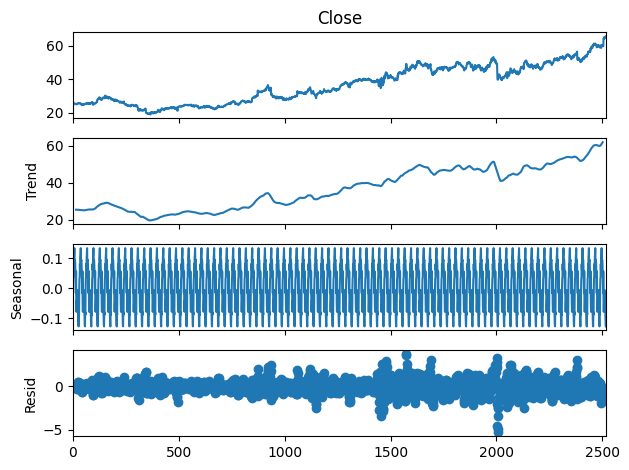

In [ ]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'],model='additive',period=30)
decompose.plot()
plt.show()

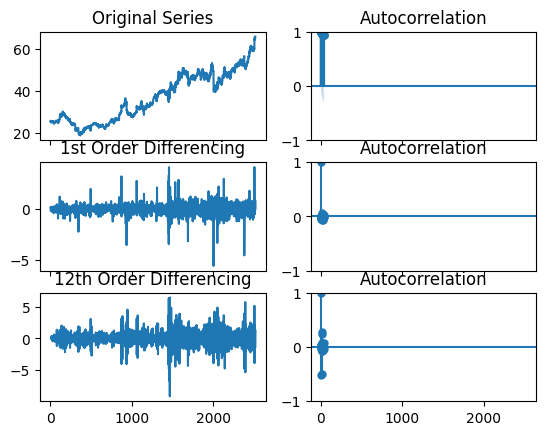

In [ ]:
# Find d value

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3,2,sharex=True)


axes[0,0].plot(df['Close']); axes[0,0].set_title('Original Series')
plot_acf(df['Close'],ax=axes[0,1])

# 1st Differencing
axes[1,0].plot(df['Close First Difference']); axes[1,0].set_title('1st Order Differencing')
plot_acf(df['Close First Difference'].dropna(), ax=axes[1,1])

# 12th Differencing
axes[2,0].plot(df['Close 12 Difference'].diff().diff()); axes[2,0].set_title('12th Order Differencing')
plot_acf(df['Close 12 Difference'].diff().diff().dropna(), ax=axes[2,1])

plt.show()

In [ ]:
d = 1

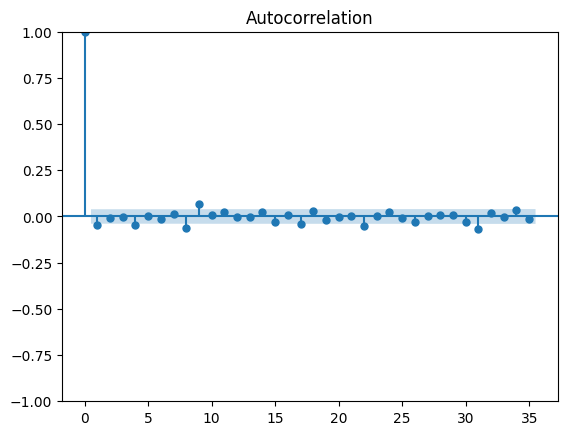

In [ ]:
# Lets find q value
# Whats the impact on the current obsv based on previous obsv

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Difficult to find the lag value at which the autocorrelation is dropping below 0.95
# pd.plotting.autocorrelation_plot(df['Close'])

# Keeping 5% Significance level, Little easier to find the lag value at which the autocorrelation is dropping below 0.95
plot_acf(df['Close First Difference'].dropna())
plt.show()

# q = 1

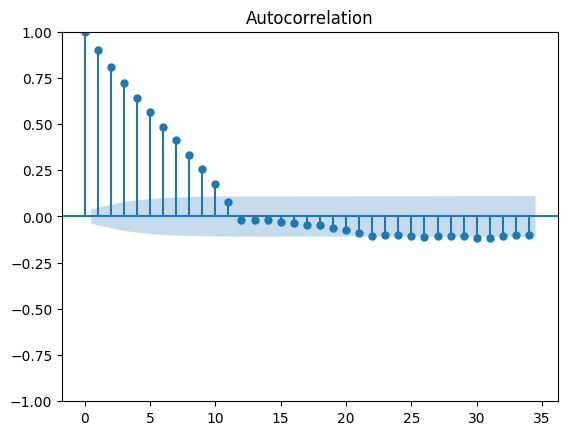

In [ ]:
plot_acf(df['Close 12 Difference'].dropna())
plt.show()

# Q = 10

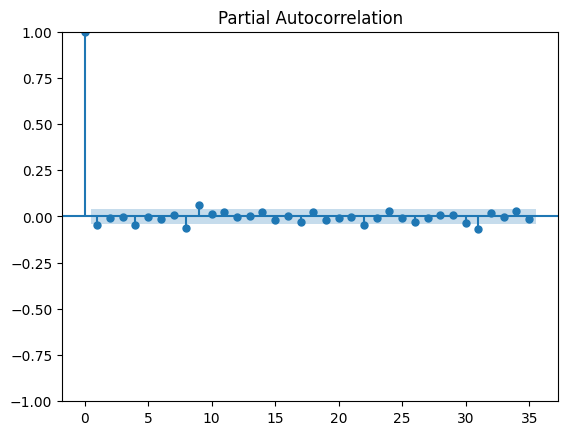

In [ ]:
# Find p value

plot_pacf(df['Close First Difference'].dropna(),alpha=0.05)
plt.show()

# p = 1

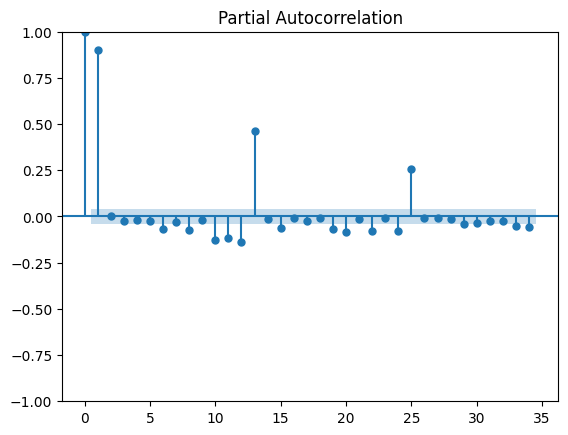

In [ ]:
plot_pacf(df['Close 12 Difference'].dropna(),alpha=0.05)
plt.show()

# P = 2

In [ ]:
df['Date'].min() # Timestamp('2019-06-03 00:00:00')
df['Date'].max() # Timestamp('2024-05-31 00:00:00')

Timestamp('2024-06-03 00:00:00')

In [ ]:
from datetime import datetime,timedelta
train_dataset_end = datetime(2023,5,31)
test_dataset_end = datetime(2024,5,31)

In [ ]:
train_data = df.loc[df['Date'] < train_dataset_end]
test_data = df.loc[df['Date'] > train_dataset_end]

In [ ]:
### prediction index
pred_start_index=test_data.index[0]
pred_end_index=test_data.index[-1]
print(pred_start_index)
print(pred_end_index)

2265
2517


In [ ]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close First Difference,Close 12 Difference
2265,2023-06-01,48.736668,49.299999,48.646667,49.136665,48.448154,20239200,0.179996,-1.490002
2266,2023-06-02,49.073334,49.669998,49.033333,49.606667,48.911572,19178100,0.470001,-0.320000
2267,2023-06-05,49.790001,50.416668,49.790001,49.933334,49.233662,15553200,0.326668,0.090000
2268,2023-06-06,49.900002,50.063332,49.503334,49.926666,49.227085,15015600,-0.006668,-0.563335
2269,2023-06-07,49.750000,50.119999,49.680000,50.000000,49.299393,24256500,0.073334,0.029999


In [ ]:
train_data.head()

,Date,Close,Close First Difference,Close 12 Difference
0,2019-06-04,34.186668,NaN,NaN
1,2019-06-05,34.806667,0.619999,NaN
2,2019-06-06,35.036667,0.230000,NaN
3,2019-06-07,35.353333,0.316666,NaN
4,2019-06-10,35.840000,0.486668,NaN


### Forecasting Model Development

In [ ]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA = ARIMA(train_data['Close'],order=(2,1,0))
model_ARIMA_fit = model_ARIMA.fit()
print(model_ARIMA_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2264
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1605.663
Date:                Tue, 04 Jun 2024   AIC                           3217.325
Time:                        18:35:06   BIC                           3234.499
Sample:                             0   HQIC                          3223.592
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0456      0.008     -5.420      0.000      -0.062      -0.029
ar.L2          0.0008      0.011      0.079      0.937      -0.020       0.022
sigma2         0.2420      0.002    107.522      0.0

In [ ]:
pred = model_ARIMA_fit.predict(start=pred_start_index,end=pred_end_index)
residuals = test_data['Close']-pred

<Axes: ylabel='Density'>

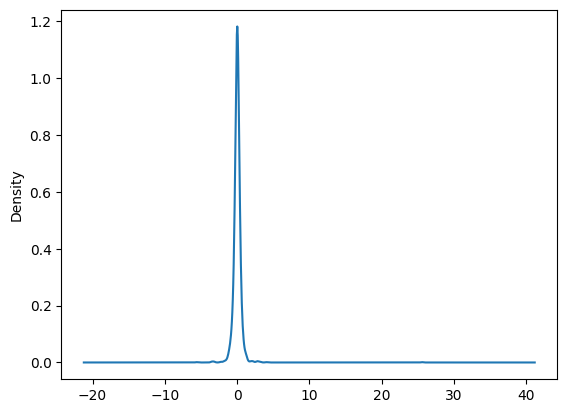

In [ ]:
model_ARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA'] = pred

<ipython-input-131-90918ede9522>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Evaluate the model
mae = mean_absolute_error(test_data['Close'], test_data['Predicted_ARIMA'])
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_data['Predicted_ARIMA']))
print(f'Test MAE: {mae}')
print(f'Test RMSE: {rmse}')

Test MAE: 6.6734046023421065
Test RMSE: 7.711892084763004


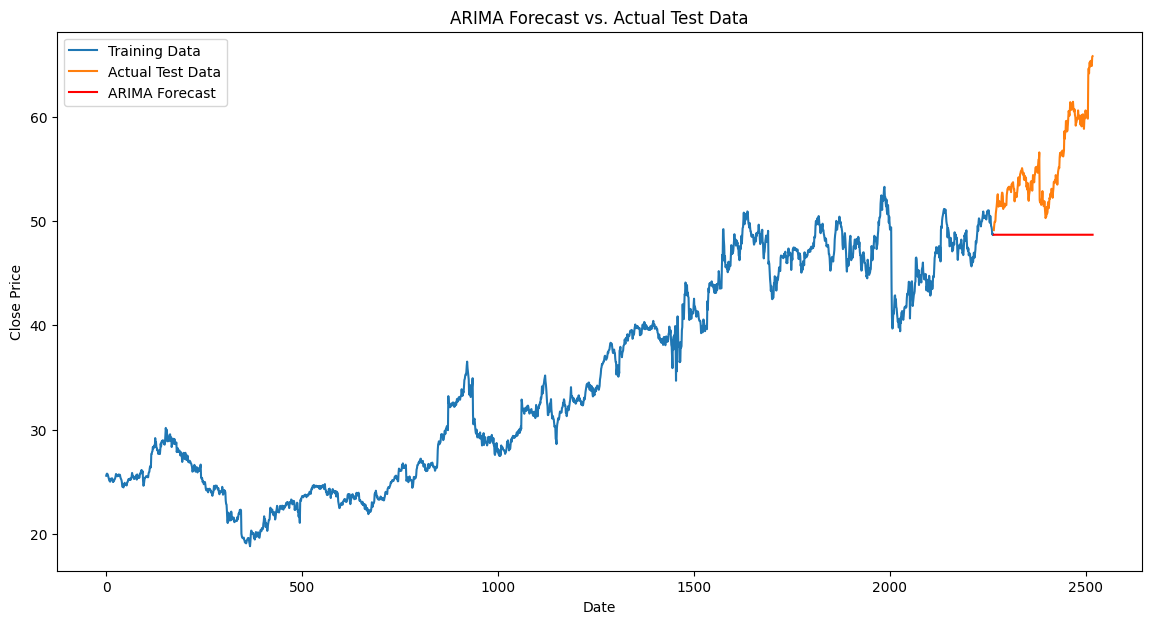

In [ ]:
# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data['Close'], label='Training Data')
plt.plot(test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, test_data['Predicted_ARIMA'], label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs. Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [ ]:
# ARIMA wont give good results for seasonal data

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Load your data
# data = pd.read_csv('your_data.csv')
# Assume 'y' is the target variable and 'exog' are the exogenous variables if any
y = df['Close']

# Define the p, d, q, P, D, Q, and s parameter ranges
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
s = [12]  # Seasonal period, e.g., 12 for monthly data

# Create a list with all possible combinations of parameters
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))

# Store the results
best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None

# Grid search
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print(f'Best SARIMAX model: SARIMAX {best_pdq}x{best_seasonal_pdq} - AIC:{best_aic}')


In [ ]:
ticker = 'WMT'
df1 = yf.download(ticker,start=start_date,end=end_date)
df1.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-04,34.203335,34.216667,33.813332,34.186668,31.580093,17894700
2019-06-05,34.250000,34.926666,34.200001,34.806667,32.152817,20708700
2019-06-06,34.830002,35.220001,34.733334,35.036667,32.365280,24191100
2019-06-07,35.076668,35.453335,35.016666,35.353333,32.657799,20428200
2019-06-10,35.493332,35.926666,35.456669,35.840000,33.107365,18977100


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


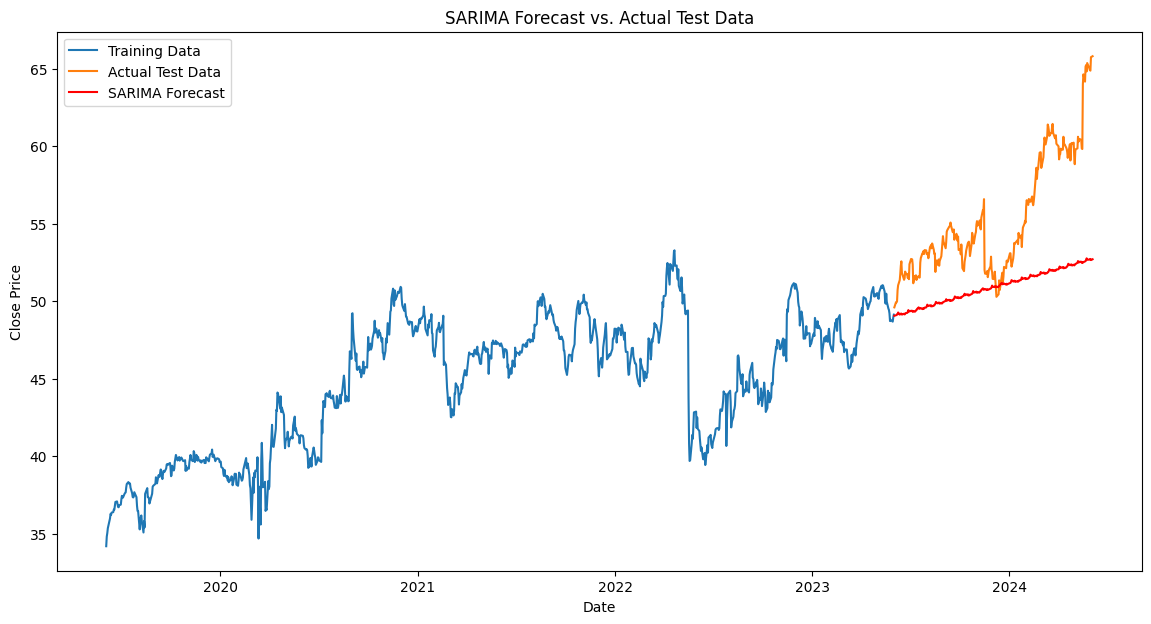

Test MAE: 4.513246661822237
Test RMSE: 5.42183590672525


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your data into a DataFrame 'df1'

# Split data into training and testing sets
train_size = int(len(df1) * 0.8)
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

# Define the SARIMA model
order = (2, 1, 10)
seasonal_order = (1, 1, 1, 12)
model_sarima = SARIMAX(train['Close'], order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
model_sarima_fit = model_sarima.fit()

# Forecast
forecast_sarima = model_sarima_fit.forecast(steps=len(test))

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Test Data')
plt.plot(test.index, forecast_sarima, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('SARIMA Forecast vs. Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Evaluate the model
mae = mean_absolute_error(test['Close'], forecast_sarima)
rmse = np.sqrt(mean_squared_error(test['Close'], forecast_sarima))
print(f'Test MAE: {mae}')
print(f'Test RMSE: {rmse}')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp88xyvqxc/gykp40ns.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp88xyvqxc/6ibid_qx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5111', 'data', 'file=/tmp/tmp88xyvqxc/gykp40ns.json', 'init=/tmp/tmp88xyvqxc/6ibid_qx.json', 'output', 'file=/tmp/tmp88xyvqxc/prophet_modelv_jjb5j5/prophet_model-20240604142841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:28:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:28:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 1.3340785639966874
RMSE: 2.090079389834646


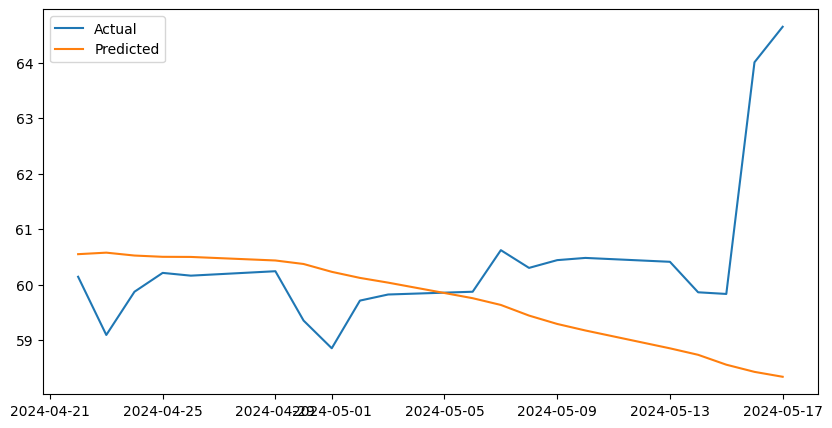

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df1 is your original dataframe
df_prophet = df1.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# Split data into training and test sets
train = df_prophet.iloc[:-30]  # use all data except the last 30 days for training
test = df_prophet.iloc[-30:]   # use the last 30 days for testing

# Define the model
model_prophet = Prophet(yearly_seasonality=True)

# Fit the model on the training set
model_prophet.fit(train)

# Create a dataframe for future dates including the test set period
future = model_prophet.make_future_dataframe(periods=30)

# Predict values
forecast_prophet = model_prophet.predict(future)

# Extract the predictions for the test set period
predictions = forecast_prophet[['ds', 'yhat']].iloc[-30:]
predictions = predictions.set_index('ds')
test = test.set_index('ds')

# Merge test set with predictions to align the dates
comparison = test.join(predictions)
comparison.dropna(inplace=True)

# Calculate metrics
mae = mean_absolute_error(comparison['y'], comparison['yhat'])
rmse = mean_squared_error(comparison['y'], comparison['yhat'], squared=False)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Plot the comparison
plt.figure(figsize=(10, 5))
plt.plot(comparison.index, comparison['y'], label='Actual')
plt.plot(comparison.index, comparison['yhat'], label='Predicted')
plt.legend()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'head'

Epoch 1/20
29/29 [==============================] - 7s 84ms/step - loss: 0.0241
Epoch 2/20
29/29 [==============================] - 2s 85ms/step - loss: 0.0028
Epoch 3/20
29/29 [==============================] - 2s 85ms/step - loss: 0.0020
Epoch 4/20
29/29 [==============================] - 3s 118ms/step - loss: 0.0017
Epoch 5/20
29/29 [==============================] - 4s 127ms/step - loss: 0.0016
Epoch 6/20
29/29 [==============================] - 2s 85ms/step - loss: 0.0015
Epoch 7/20
29/29 [==============================] - 2s 85ms/step - loss: 0.0014
Epoch 8/20
29/29 [==============================] - 2s 85ms/step - loss: 0.0013
Epoch 9/20
29/29 [==============================] - 3s 100ms/step - loss: 0.0013
Epoch 10/20
29/29 [==============================] - 4s 148ms/step - loss: 0.0012
Epoch 11/20
29/29 [==============================] - 3s 91ms/step - loss: 0.0012
Epoch 12/20
29/29 [==============================] - 2s 83ms/step - loss: 0.0011
Epoch 13/20
29/29 [==============

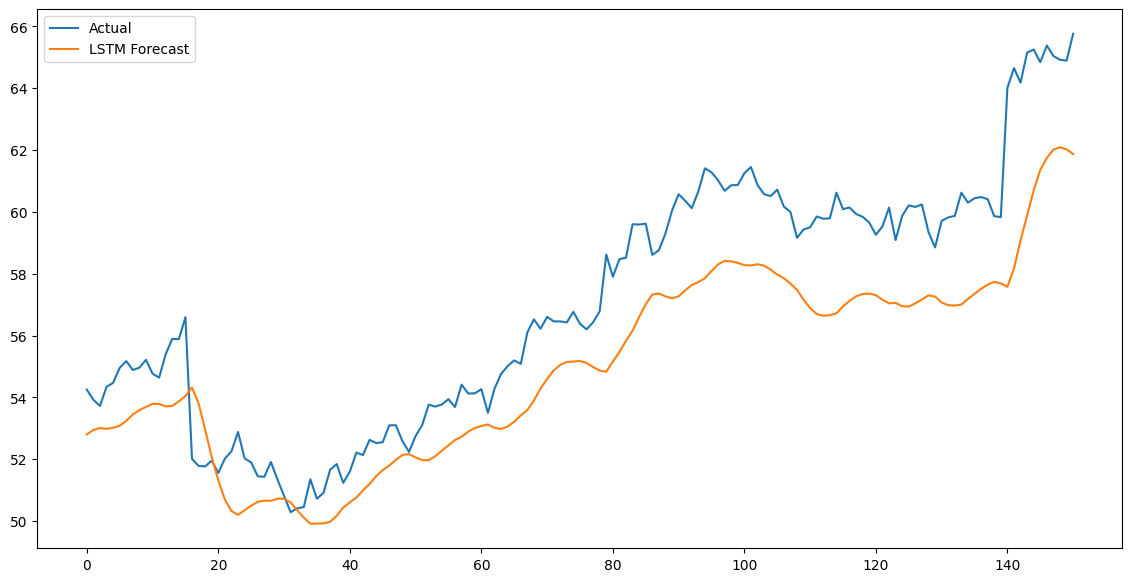

Test MAE: 2.1038334069662534
Test RMSE: 2.3819023615854924


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming df is your original dataframe with 'Date' and 'Close' columns
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df1['Close'].values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Split data into training and testing sets
train_size = int(len(df_scaled) * 0.8)  # 80% for training
test_size = len(df_scaled) - train_size
train, test = df_scaled[0:train_size], df_scaled[train_size:len(df_scaled)]

# Prepare the data for LSTM
time_step = 100
X_train, Y_train = create_dataset(train, time_step)
X_test, Y_test = create_dataset(test, time_step)

# Reshape the data to fit the LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))

# Compile and fit the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, Y_train, epochs=20, batch_size=32)

# Forecast for the test set
predicted_close_test = model_lstm.predict(X_test)

# Inverse transform both actual and predicted values
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))
predicted_close_test = scaler.inverse_transform(predicted_close_test)

# Plot the comparison
plt.figure(figsize=(14, 7))
plt.plot(Y_test_actual, label='Actual')
plt.plot(predicted_close_test, label='LSTM Forecast')
plt.legend()
plt.show()

# Calculate and print evaluation metrics
mae_test = mean_absolute_error(Y_test_actual, predicted_close_test)
rmse_test = np.sqrt(mean_squared_error(Y_test_actual, predicted_close_test))
print(f'Test MAE: {mae_test}')
print(f'Test RMSE: {rmse_test}')


In [ ]:
# Define the ticker

ticker = 'WMT'
df = yf.download(ticker,start=start_date,end=end_date)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-03,25.580000,25.656668,25.453333,25.570000,20.785954,21640800
2014-06-04,25.533333,25.766666,25.510000,25.709999,20.899765,18599700
2014-06-05,25.683332,25.813334,25.623333,25.773333,20.951250,14087400
2014-06-06,25.820000,25.863333,25.690001,25.736668,20.921446,12566700
2014-06-09,25.690001,25.920000,25.566668,25.670000,20.867252,16642800


Epoch 1/20
29/29 [==============================] - 8s 147ms/step - loss: 0.0200
Epoch 2/20
29/29 [==============================] - 3s 95ms/step - loss: 0.0030
Epoch 3/20
29/29 [==============================] - 2s 84ms/step - loss: 0.0022
Epoch 4/20
29/29 [==============================] - 2s 85ms/step - loss: 0.0020
Epoch 5/20
29/29 [==============================] - 3s 86ms/step - loss: 0.0018
Epoch 6/20
29/29 [==============================] - 4s 128ms/step - loss: 0.0018
Epoch 7/20
29/29 [==============================] - 4s 122ms/step - loss: 0.0017
Epoch 8/20
29/29 [==============================] - 2s 85ms/step - loss: 0.0015
Epoch 9/20
29/29 [==============================] - 2s 85ms/step - loss: 0.0014
Epoch 10/20
29/29 [==============================] - 3s 86ms/step - loss: 0.0014
Epoch 11/20
29/29 [==============================] - 3s 109ms/step - loss: 0.0013
Epoch 12/20
29/29 [==============================] - 4s 145ms/step - loss: 0.0013
Epoch 13/20
29/29 [=============

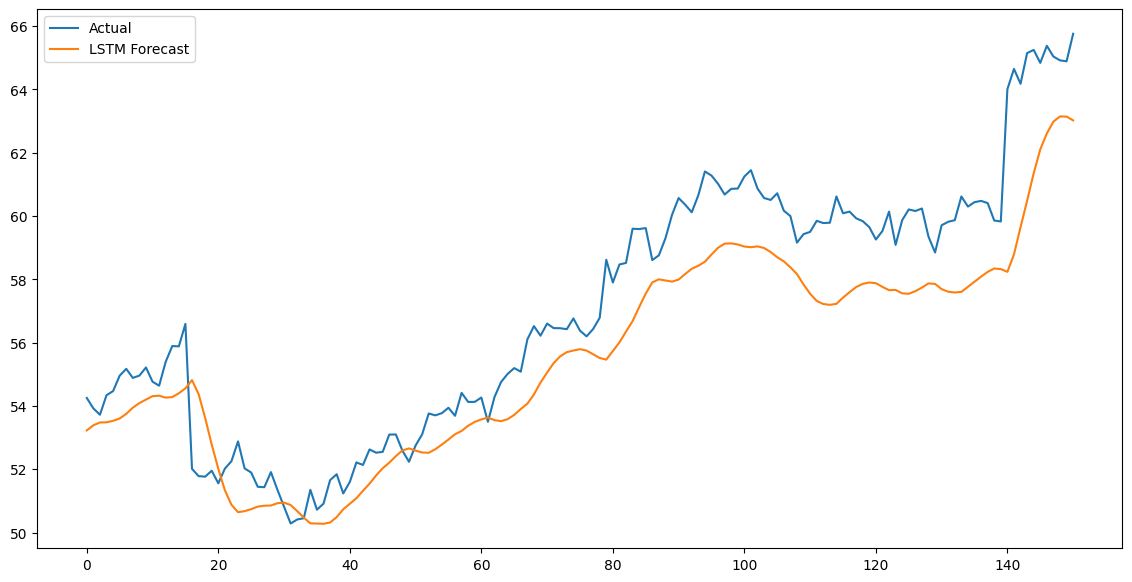

Test MAE: 1.6032738085614135
Test RMSE: 1.8916743686288993


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming df is your original dataframe with 'Date' and 'Close' columns
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df1['Close'].values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Split data into training and testing sets
train_size = int(len(df_scaled) * 0.8)  # 80% for training
test_size = len(df_scaled) - train_size
train, test = df_scaled[0:train_size], df_scaled[train_size:len(df_scaled)]

# Prepare the data for LSTM
time_step = 100
X_train, Y_train = create_dataset(train, time_step)
X_test, Y_test = create_dataset(test, time_step)

# Reshape the data to fit the LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))

# Compile and fit the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, Y_train, epochs=20, batch_size=32)

# Forecast for the test set
predicted_close_test = model_lstm.predict(X_test)

# Inverse transform both actual and predicted values
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))
predicted_close_test = scaler.inverse_transform(predicted_close_test)

# Plot the comparison
plt.figure(figsize=(14, 7))
plt.plot(Y_test_actual, label='Actual')
plt.plot(predicted_close_test, label='LSTM Forecast')
plt.legend()
plt.show()

# Calculate and print evaluation metrics
mae_test = mean_absolute_error(Y_test_actual, predicted_close_test)
rmse_test = np.sqrt(mean_squared_error(Y_test_actual, predicted_close_test))
print(f'Test MAE: {mae_test}')
print(f'Test RMSE: {rmse_test}')

# Function to predict the close price for a given date
def predict_close_for_date(df, date, model, scaler, time_step=100):
    date_index = df.index.get_loc(date)
    if date_index < time_step:
        raise ValueError("Not enough data to predict for this date.")

    input_data = df_scaled[date_index-time_step:date_index].reshape(1, time_step, 1)
    scaled_prediction = model.predict(input_data)
    predicted_close = scaler.inverse_transform(scaled_prediction)
    return predicted_close[0][0]

# # Example usage
# # Provide the specific date in the format 'YYYY-MM-DD'
# specific_date = '2023-06-01'
# predicted_close = predict_close_for_date(df1, specific_date, model_lstm, scaler, time_step)
# print(f'Predicted Close Price for {specific_date}: {predicted_close}')


In [ ]:

# Example usage
# Provide the specific date in the format 'YYYY-MM-DD'
specific_date = '2023-12-01'
predicted_close = predict_close_for_date(df1, specific_date, model_lstm, scaler, time_step)
print(f'Predicted Close Price for {specific_date}: {predicted_close}')

1/1 [==============================] - 0s 128ms/step
Predicted Close Price for 2023-12-01: 50.82072830200195
